# Last Modified: 05/04/2023

Estimated Runtime: 6-7 minutes

In [2]:
# Importing nessecary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

## Reading in and splitting the data using sklearn

In [ ]:
# Reading in data
# Change the filepath according to system
df = pd.read_csv("/Users/archelolazabal/Desktop/GMUSpring2023/Archel_Olazabal_CDS492/Data/Dataset3_Processed.csv")
df

In [46]:
# Removing none target features and non-numerical features. 
features = df.columns.tolist()
features.remove('Merchant City') # This is a String
features.remove('Merchant State') # This is a String
features.remove('Errors?') # This is a String
features.remove('Is Fraud?') # This is the target variable
#features.remove('Merchant City Code') # for testing purposes
#features.remove('Merchant State Code') # for testing purposes
#features.remove('Error Code') # for testing purposes

features

['User',
 'Year',
 'Month',
 'Day',
 'Time',
 'Amount',
 'Use Chip',
 'Merchant Name',
 'Zip',
 'MCC',
 'Card Number: 8',
 'Card Number: 7',
 'Card Number: 6',
 'Card Number: 5',
 'Card Number: 4',
 'Card Number: 3',
 'Card Number: 1',
 'Card Number: 2',
 'Card Number: 0',
 'Merchant State Code',
 'Merchant City Code',
 'Error Code']

In [47]:
# creating the target values and the variables 
y = df['Is Fraud?']
X = df[features]

# Splitting the data 
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.30, random_state=42)

How many fraud cases in the testing data.<br><br>

There are 8,883 rows that are fraud in the y_testing set.

In [49]:
Y = pd.DataFrame(y1_test)
Y

,Is Fraud?
53480,0
14766,0
65707,0
78660,1
30994,0
...,...
26130,0
1228,0
60338,0
35177,0


In [50]:
df_temp = Y.loc[Y['Is Fraud?'] == 1]
df_temp

,Is Fraud?
78660,1
93821,1
86564,1
86681,1
79124,1
...,...
85383,1
70890,1
74296,1
87610,1


# Archel Olazabal | Random Forest

## Experiment 1: Baseline 

In [15]:
models = [RandomForestClassifier(n_jobs=-1, random_state=26)]

Accuracy of the model (training) RandomForestClassifier(n_jobs=-1, random_state=26) =  1.0
Accuracy of the model (testing) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.9552592889601711
F1 score of the model (training) RandomForestClassifier(n_jobs=-1, random_state=26) =  1.0
F1 score of the model (testing) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.921119293078056
Mean Absolute Error of the model (training) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.0
Mean Absolute Error of the model (testing) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.04474071103982892
Mean Squared Error of the model (training) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.0
Mean Squared Error of the model (testing) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.04474071103982892
Precision of the model (training) RandomForestClassifier(n_jobs=-1, random_state=26) =  1.0
Precision of the model (testing) RandomForestClassifier(n_jobs=-1, random_state=2

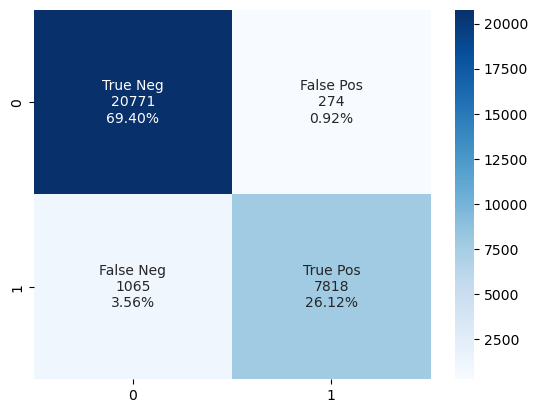

In [16]:
# Model testing
for model in models:
        model.fit(X1_train, y1_train)
        test_data_prediction = model.predict(X1_test)
        train_data_prediction = model.predict(X1_train)
        mae = mean_absolute_error(y1_train, train_data_prediction)
        mae2 = mean_absolute_error(y1_test, test_data_prediction)
        mse = mean_squared_error(y1_train, train_data_prediction)
        mse2 = mean_squared_error(y1_test, test_data_prediction)
        precision = precision_score(y1_train, train_data_prediction)
        precision2 = precision_score(y1_test, test_data_prediction)
        recall = recall_score(y1_train, train_data_prediction)
        recall2 = recall_score(y1_test, test_data_prediction)
        #r2 = r2_score(y1_test, test_data_prediction)
        f1_1 = f1_score(y1_train, train_data_prediction)
        f1_2 = f1_score(y1_test, test_data_prediction)
        accuracy = accuracy_score(y1_train, train_data_prediction)
        accuracy2 = accuracy_score(y1_test, test_data_prediction)
        print('Accuracy of the model (training)', model, '= ', accuracy)
        print('Accuracy of the model (testing)', model, '= ', accuracy2)
        print('F1 score of the model (training)', model, '= ', f1_1)
        print('F1 score of the model (testing)', model, '= ', f1_2)
        print('Mean Absolute Error of the model (training)', model, '= ', mae)
        print('Mean Absolute Error of the model (testing)', model, '= ', mae2)
        print('Mean Squared Error of the model (training)', model, '= ', mse)
        print('Mean Squared Error of the model (testing)', model, '= ', mse2)
        print('Precision of the model (training)', model, '= ', precision)
        print('Precision of the model (testing)', model, '= ', precision2)
        print('Recall of the model (training)', model, '= ', recall)
        print('Recall of the model (testing)', model, '= ', recall2, '\n')

        cf_matrix =confusion_matrix(y1_test, test_data_prediction)

        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
                zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Experiment 2: Using Optimal Hyperparameters

### The experiment did slightly reduce the performance metrcis on the training data but it did reduce the gap between the testing and training metrics. In some metrics it even increased the score for the testing data.

In [17]:
# This creates the features for testing
search_space = {
    "criterion" : ["entropy", "gini", "log_loss"],
    "n_jobs" : [-1],
    "random_state" : [26],
    "max_depth" : [5, 10, 15, 20],
    "n_estimators" : [20, 30, 40, 50],
    "min_samples_split" : [5, 10, 15, 20]
}

# This creates the tester for hyperparameters.
# The refit parameters is the metric that the GridSearchCV determines the model performance.
GS = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = search_space,
    scoring = ["f1", "precision", "recall", "accuracy", "neg_root_mean_squared_error"],
    refit = "f1", 
    cv=3,
    verbose=4,
)

In [18]:
GS.fit(X1_train, y1_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END criterion=entropy, max_depth=5, min_samples_split=5, n_estimators=20, n_jobs=-1, random_state=26; accuracy: (test=0.907) f1: (test=0.838) neg_root_mean_squared_error: (test=-0.306) precision: (test=0.871) recall: (test=0.808) total time=   1.7s
[CV 2/3] END criterion=entropy, max_depth=5, min_samples_split=5, n_estimators=20, n_jobs=-1, random_state=26; accuracy: (test=0.886) f1: (test=0.812) neg_root_mean_squared_error: (test=-0.338) precision: (test=0.798) recall: (test=0.827) total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=5, min_samples_split=5, n_estimators=20, n_jobs=-1, random_state=26; accuracy: (test=0.888) f1: (test=0.816) neg_root_mean_squared_error: (test=-0.335) precision: (test=0.801) recall: (test=0.833) total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=5, min_samples_split=5, n_estimators=30, n_jobs=-1, random_state=26; accuracy: (test=0.906) f1: (test=0.839) neg_root_mea

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [20, 30, 40, 50], 'n_jobs': [-1],
                         'random_state': [26]},
             refit='f1',
             scoring=['f1', 'precision', 'recall', 'accuracy',
                      'neg_root_mean_squared_error'],
             verbose=4)

In [19]:
# Printing the best results
print(GS.best_score_)
print(GS.best_params_)

0.9116682706357814
{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 40, 'n_jobs': -1, 'random_state': 26}


In [20]:
parameters = GS.best_params_
models2 = [RandomForestClassifier(criterion=parameters['criterion'], 
                                  max_depth=parameters['max_depth'], 
                                  min_samples_split=parameters['min_samples_split'], 
                                  n_estimators=parameters['n_estimators'], 
                                  n_jobs=-1, 
                                  random_state=26)]

Accuracy of the model (training) RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=40,
                       n_jobs=-1, random_state=26) =  0.9808245857738189
Accuracy of the model (testing) RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=40,
                       n_jobs=-1, random_state=26) =  0.9522854851643946
F1 score of the model (training) RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=40,
                       n_jobs=-1, random_state=26) =  0.9672975943338625
F1 score of the model (testing) RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=40,
                       n_jobs=-1, random_state=26) =  0.9160888471030674
Mean Absolute Error of the model (training) RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=40,
                       n_jobs=-1, random_state=26) =  0.0191754142261811
Mean Absolute Error of the model (testing) RandomForestClassifier(max_depth=20, min_sa

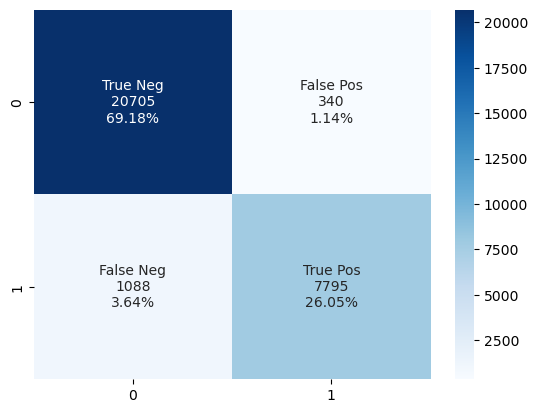

In [21]:
# Model testing
for model in models2:
    model.fit(X1_train, y1_train)
    test_data_prediction = model.predict(X1_test)
    train_data_prediction = model.predict(X1_train)
    mae = mean_absolute_error(y1_train, train_data_prediction)
    mae2 = mean_absolute_error(y1_test, test_data_prediction)
    mse = mean_squared_error(y1_train, train_data_prediction)
    mse2 = mean_squared_error(y1_test, test_data_prediction)
    precision = precision_score(y1_train, train_data_prediction)
    precision2 = precision_score(y1_test, test_data_prediction)
    recall = recall_score(y1_train, train_data_prediction)
    recall2 = recall_score(y1_test, test_data_prediction)
    #r2 = r2_score(y1_test, test_data_prediction)
    f1_1 = f1_score(y1_train, train_data_prediction)
    f1_2 = f1_score(y1_test, test_data_prediction)
    accuracy = accuracy_score(y1_train, train_data_prediction)
    accuracy2 = accuracy_score(y1_test, test_data_prediction)
    print('Accuracy of the model (training)', model, '= ', accuracy)
    print('Accuracy of the model (testing)', model, '= ', accuracy2)
    print('F1 score of the model (training)', model, '= ', f1_1)
    print('F1 score of the model (testing)', model, '= ', f1_2)
    print('Mean Absolute Error of the model (training)', model, '= ', mae)
    print('Mean Absolute Error of the model (testing)', model, '= ', mae2)
    print('Mean Squared Error of the model (training)', model, '= ', mse)
    print('Mean Squared Error of the model (testing)', model, '= ', mse2)
    print('Precision of the model (training)', model, '= ', precision)
    print('Precision of the model (testing)', model, '= ', precision2)
    print('Recall of the model (training)', model, '= ', recall)
    print('Recall of the model (testing)', model, '= ', recall2, '\n')

    cf_matrix =confusion_matrix(y1_test, test_data_prediction)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


## Experiment 3: Using the same model with features selection

In [22]:
# Creating the feature selection through weights
sel = SelectFromModel(RandomForestClassifier(n_jobs=-1, random_state=26))
sel.fit(X1_train, y1_train)

selected_feat= X1_train.columns[(sel.get_support())]

print(selected_feat)

Index(['Year', 'Amount', 'Use Chip', 'Merchant Name', 'Zip', 'MCC',
       'Merchant State Code', 'Merchant City Code'],
      dtype='object')


In [23]:
# Recreating the dataset split with the features selection applied.
y3 = df['Is Fraud?']
X3 = df[selected_feat]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=42)

In [24]:
models3 = [RandomForestClassifier(n_jobs=-1, random_state=26)]

Accuracy of the model (training) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.9999856793022956
Accuracy of the model (testing) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.9558273188986902
F1 score of the model (training) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.9999760461829592
F1 score of the model (testing) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.9221436984687869
Mean Absolute Error of the model (training) RandomForestClassifier(n_jobs=-1, random_state=26) =  1.4320697704392159e-05
Mean Absolute Error of the model (testing) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.04417268110130981
Mean Squared Error of the model (training) RandomForestClassifier(n_jobs=-1, random_state=26) =  1.4320697704392159e-05
Mean Squared Error of the model (testing) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.04417268110130981
Precision of the model (training) RandomForestClassifier(n_jobs=-1, random_state=26) =  1.0
Precision of

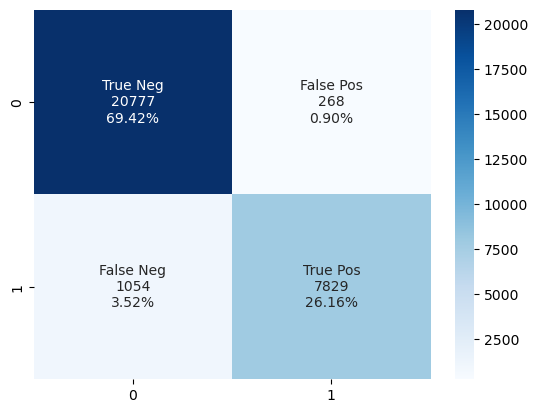

In [25]:
# Testing the model using different criterion
# models = [RandomForestClassifier(criterion='gini', n_jobs=-1), RandomForestClassifier(criterion='entrophy', n_jobs=-1), RandomForestClassifier(criterion='log_loss', n_jobs=-1)]
for model in models3:
    model.fit(X3_train, y3_train)
    test_data_prediction = model.predict(X3_test)
    train_data_prediction = model.predict(X3_train)
    mae = mean_absolute_error(y3_train, train_data_prediction)
    mae2 = mean_absolute_error(y3_test, test_data_prediction)
    mse = mean_squared_error(y3_train, train_data_prediction)
    mse2 = mean_squared_error(y3_test, test_data_prediction)
    precision = precision_score(y3_train, train_data_prediction)
    precision2 = precision_score(y3_test, test_data_prediction)
    recall = recall_score(y3_train, train_data_prediction)
    recall2 = recall_score(y3_test, test_data_prediction)
    #r2 = r2_score(y1_test, test_data_prediction)
    f1_1 = f1_score(y3_train, train_data_prediction)
    f1_2 = f1_score(y3_test, test_data_prediction)
    accuracy = accuracy_score(y3_train, train_data_prediction)
    accuracy2 = accuracy_score(y3_test, test_data_prediction)
    print('Accuracy of the model (training)', model, '= ', accuracy)
    print('Accuracy of the model (testing)', model, '= ', accuracy2)
    print('F1 score of the model (training)', model, '= ', f1_1)
    print('F1 score of the model (testing)', model, '= ', f1_2)
    print('Mean Absolute Error of the model (training)', model, '= ', mae)
    print('Mean Absolute Error of the model (testing)', model, '= ', mae2)
    print('Mean Squared Error of the model (training)', model, '= ', mse)
    print('Mean Squared Error of the model (testing)', model, '= ', mse2)
    print('Precision of the model (training)', model, '= ', precision)
    print('Precision of the model (testing)', model, '= ', precision2)
    print('Recall of the model (training)', model, '= ', recall)
    print('Recall of the model (testing)', model, '= ', recall2, '\n')

    cf_matrix =confusion_matrix(y3_test, test_data_prediction)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Archel Olazabal | Logistic Regression

## Experiment 1: Baseline Run

In [26]:
# Creating the model
models = [LogisticRegression(max_iter = 130, n_jobs=-1, random_state=26)]

Accuracy of the model (training) LogisticRegression(max_iter=130, n_jobs=-1, random_state=26) =  0.5214882069054404
Accuracy of the model (testing) LogisticRegression(max_iter=130, n_jobs=-1, random_state=26) =  0.5186113338679498
F1 score of the model (training) LogisticRegression(max_iter=130, n_jobs=-1, random_state=26) =  0.38213757396449705
F1 score of the model (testing) LogisticRegression(max_iter=130, n_jobs=-1, random_state=26) =  0.378553250226459
Mean Absolute Error of the model (training) LogisticRegression(max_iter=130, n_jobs=-1, random_state=26) =  0.47851179309455955
Mean Absolute Error of the model (testing) LogisticRegression(max_iter=130, n_jobs=-1, random_state=26) =  0.4813886661320503
Mean Squared Error of the model (training) LogisticRegression(max_iter=130, n_jobs=-1, random_state=26) =  0.47851179309455955
Mean Squared Error of the model (testing) LogisticRegression(max_iter=130, n_jobs=-1, random_state=26) =  0.4813886661320503
Precision of the model (training

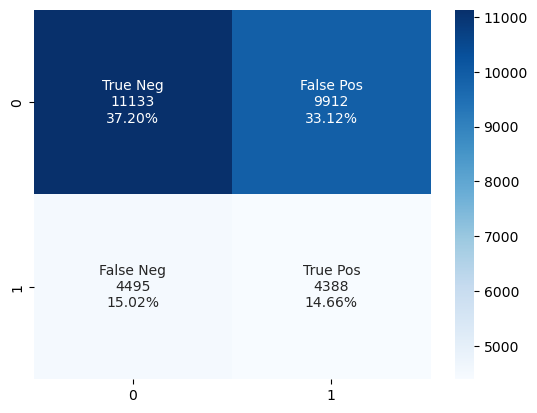

In [27]:
# Fitting the model and calculating the performance metrics
for model in models:
    model.fit(X1_train, y1_train)
    test_data_prediction = model.predict(X1_test)
    train_data_prediction = model.predict(X1_train)
    mae = mean_absolute_error(y1_train, train_data_prediction)
    mae2 = mean_absolute_error(y1_test, test_data_prediction)
    mse = mean_squared_error(y1_train, train_data_prediction)
    mse2 = mean_squared_error(y1_test, test_data_prediction)
    precision = precision_score(y1_train, train_data_prediction)
    precision2 = precision_score(y1_test, test_data_prediction)
    recall = recall_score(y1_train, train_data_prediction)
    recall2 = recall_score(y1_test, test_data_prediction)
    #r2 = r2_score(y1_test, test_data_prediction)
    f1_1 = f1_score(y1_train, train_data_prediction)
    f1_2 = f1_score(y1_test, test_data_prediction)
    accuracy = accuracy_score(y1_train, train_data_prediction)
    accuracy2 = accuracy_score(y1_test, test_data_prediction)
    print('Accuracy of the model (training)', model, '= ', accuracy)
    print('Accuracy of the model (testing)', model, '= ', accuracy2)
    print('F1 score of the model (training)', model, '= ', f1_1)
    print('F1 score of the model (testing)', model, '= ', f1_2)
    print('Mean Absolute Error of the model (training)', model, '= ', mae)
    print('Mean Absolute Error of the model (testing)', model, '= ', mae2)
    print('Mean Squared Error of the model (training)', model, '= ', mse)
    print('Mean Squared Error of the model (testing)', model, '= ', mse2)
    print('Precision of the model (training)', model, '= ', precision)
    print('Precision of the model (testing)', model, '= ', precision2)
    print('Recall of the model (training)', model, '= ', recall)
    print('Recall of the model (testing)', model, '= ', recall2, '\n')

    cf_matrix =confusion_matrix(y1_test, test_data_prediction)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Experiment 2: Hyperparameter Tunning

### For this specific experiment tuning was not successful since there is not change between Experiment 1 and Experiment 2.

In [28]:
# Creating a dictionary for parameters to be choosen
search_space = {
    "penalty" : ['l2', 'none'],
    "fit_intercept" : [True, False],
    "random_state" : [26],
    "solver" : ['newton-cg', 'sag', 'saga', 'lbfgs', 'liblinear'],
    "max_iter" : [130, 140, 150],
    "n_jobs" : [-1]

# This creates the tester for hyperparameters.
# The refit parameters is the metric that the GridSearchCV determines the model performance.
}
GS = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid = search_space,
    scoring = ["f1", "precision", "recall", "accuracy", "neg_root_mean_squared_error"],
    refit = "f1",
    cv=3,
    verbose=4,
)

In [29]:
GS.fit(X1_train, y1_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END fit_intercept=True, max_iter=130, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.4s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END fit_intercept=True, max_iter=130, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.6s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END fit_intercept=True, max_iter=130, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.7s
[CV 1/3] END fit_intercept=True, max_iter=130, n_jobs=-1, penalty=l2, random_state=26, solver=sag; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.4s
[CV 2/3] END fit_intercept=True, max_iter=130, n_jobs=-1, penalty=l2, random_state=26, solver=sag; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.5s
[CV 3/3] END fit_intercept=True, max_iter=130, n_jobs=-1, penalty=l2, random_state=26, solver=sag; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.4s
[CV 1/3] E

/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV 1/3] END fit_intercept=True, max_iter=130, n_jobs=-1, penalty=l2, random_state=26, solver=liblinear; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   1.5s
[CV 2/3] END fit_intercept=True, max_iter=130, n_jobs=-1, penalty=l2, random_state=26, solver=liblinear; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.0s
[CV 3/3] END fit_intercept=True, max_iter=130, n_jobs=-1, penalty=l2, random_state=26, solver=liblinear; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.0s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/lin

[CV 1/3] END fit_intercept=True, max_iter=130, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.3s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END fit_intercept=True, max_iter=130, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.5s
[CV 3/3] END fit_intercept=True, max_iter=130, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.6s
[CV 1/3] END fit_intercept=True, max_iter=130, n_jobs=-1, penalty=none, random_state=26, solver=sag; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.4s
[CV 2/3] END fit_intercept=True, max_iter=130, n_jobs=-1, penalty=none, random_state=26, solver=sag; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0

/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END fit_intercept=True, max_iter=140, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.4s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END fit_intercept=True, max_iter=140, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.5s
[CV 3/3] END fit_intercept=True, max_iter=140, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.7s
[CV 1/3] END fit_intercept=True, max_iter=140, n_jobs=-1, penalty=l2, random_state=26, solver=sag; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.4s
[CV 2/3] END fit_intercept=True, max_iter=140, n_jobs=-1, penalty=l2, random_state=26, solver=sag; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.4s
[CV 

/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesear

[CV 1/3] END fit_intercept=True, max_iter=140, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.3s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END fit_intercept=True, max_iter=140, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.5s
[CV 3/3] END fit_intercept=True, max_iter=140, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.6s
[CV 1/3] END fit_intercept=True, max_iter=140, n_jobs=-1, penalty=none, random_state=26, solver=sag; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.4s
[CV 2/3] END fit_intercept=True, max_iter=140, n_jobs=-1, penalty=none, random_state=26, solver=sag; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0

/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END fit_intercept=True, max_iter=150, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.4s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END fit_intercept=True, max_iter=150, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.5s
[CV 3/3] END fit_intercept=True, max_iter=150, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.6s
[CV 1/3] END fit_intercept=True, max_iter=150, n_jobs=-1, penalty=l2, random_state=26, solver=sag; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.4s
[CV 2/3] END fit_intercept=True, max_iter=150, n_jobs=-1, penalty=l2, random_state=26, solver=sag; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.4s
[CV 

/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesear

[CV 1/3] END fit_intercept=True, max_iter=150, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.3s
[CV 2/3] END fit_intercept=True, max_iter=150, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.5s
[CV 3/3] END fit_intercept=True, max_iter=150, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.6s
[CV 1/3] END fit_intercept=True, max_iter=150, n_jobs=-1, penalty=none, random_state=26, solver=sag; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total tim

/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END fit_intercept=False, max_iter=130, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.3s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END fit_intercept=False, max_iter=130, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.4s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END fit_intercept=False, max_iter=130, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.8s
[CV 1/3] END fit_intercept=False, max_iter=130, n_jobs=-1, penalty=l2, random_state=26, solver=sag; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.4s
[CV 2/3] END fit_intercept=False, max_iter=130, n_jobs=-1, penalty=l2, random_state=26, solver=sag; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.4s
[CV 3/3] END fit_intercept=False, max_iter=130, n_jobs=-1, penalty=l2, random_state=26, solver=sag; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.4s
[CV 1/

/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesear

[CV 1/3] END fit_intercept=False, max_iter=130, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.3s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END fit_intercept=False, max_iter=130, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.3s
[CV 3/3] END fit_intercept=False, max_iter=130, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.7s
[CV 1/3] END fit_intercept=False, max_iter=130, n_jobs=-1, penalty=none, random_state=26, solver=sag; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.4s
[CV 2/3] END fit_intercept=False, max_iter=130, n_jobs=-1, penalty=none, random_state=26, solver=sag; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=

/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END fit_intercept=False, max_iter=140, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.3s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END fit_intercept=False, max_iter=140, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.3s
[CV 3/3] END fit_intercept=False, max_iter=140, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.7s
[CV 1/3] END fit_intercept=False, max_iter=140, n_jobs=-1, penalty=l2, random_state=26, solver=sag; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.4s
[CV 2/3] END fit_intercept=False, max_iter=140, n_jobs=-1, penalty=l2, random_state=26, solver=sag; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.4s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesear

[CV 1/3] END fit_intercept=False, max_iter=140, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.4s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END fit_intercept=False, max_iter=140, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.4s
[CV 3/3] END fit_intercept=False, max_iter=140, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.7s
[CV 1/3] END fit_intercept=False, max_iter=140, n_jobs=-1, penalty=none, random_state=26, solver=sag; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.4s
[CV 2/3] END fit_intercept=False, max_iter=140, n_jobs=-1, penalty=none, random_state=26, solver=sag; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=

/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END fit_intercept=False, max_iter=150, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.3s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END fit_intercept=False, max_iter=150, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.3s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END fit_intercept=False, max_iter=150, n_jobs=-1, penalty=l2, random_state=26, solver=newton-cg; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.8s
[CV 1/3] END fit_intercept=False, max_iter=150, n_jobs=-1, penalty=l2, random_state=26, solver=sag; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.4s
[CV 2/3] END fit_intercept=False, max_iter=150, n_jobs=-1, penalty=l2, random_state=26, solver=sag; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.5s
[CV 3/3] END fit_intercept=False, max_iter=150, n_jobs=-1, penalty=l2, random_state=26, solver=sag; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.4s
[CV 1/

/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesear

[CV 1/3] END fit_intercept=False, max_iter=150, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.3s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END fit_intercept=False, max_iter=150, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.3s


/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END fit_intercept=False, max_iter=150, n_jobs=-1, penalty=none, random_state=26, solver=newton-cg; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.8s
[CV 1/3] END fit_intercept=False, max_iter=150, n_jobs=-1, penalty=none, random_state=26, solver=sag; accuracy: (test=0.517) f1: (test=0.379) neg_root_mean_squared_error: (test=-0.695) precision: (test=0.307) recall: (test=0.492) total time=   0.4s
[CV 2/3] END fit_intercept=False, max_iter=150, n_jobs=-1, penalty=none, random_state=26, solver=sag; accuracy: (test=0.519) f1: (test=0.382) neg_root_mean_squared_error: (test=-0.693) precision: (test=0.310) recall: (test=0.497) total time=   0.5s
[CV 3/3] END fit_intercept=False, max_iter=150, n_jobs=-1, penalty=none, random_state=26, solver=sag; accuracy: (test=0.529) f1: (test=0.386) neg_root_mean_squared_error: (test=-0.687) precision: (test=0.316) recall: (test=0.496) total time=   0.4

/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/skle

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [130, 140, 150], 'n_jobs': [-1],
                         'penalty': ['l2', 'none'], 'random_state': [26],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs',
                                    'liblinear']},
             refit='f1',
             scoring=['f1', 'precision', 'recall', 'accuracy',
                      'neg_root_mean_squared_error'],
             verbose=4)

In [30]:
print(GS.best_score_)
print(GS.best_params_)

0.3821536542737996
{'fit_intercept': True, 'max_iter': 130, 'n_jobs': -1, 'penalty': 'l2', 'random_state': 26, 'solver': 'newton-cg'}


In [31]:
# Creating the model
parameters2 = GS.best_params_
models = [LogisticRegression(solver=parameters2['solver'], max_iter=parameters2['max_iter'], n_jobs=-1, random_state=26)]

/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/archelolazabal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Accuracy of the model (training) LogisticRegression(max_iter=130, n_jobs=-1, random_state=26, solver='newton-cg') =  0.5214882069054404
Accuracy of the model (testing) LogisticRegression(max_iter=130, n_jobs=-1, random_state=26, solver='newton-cg') =  0.5186113338679498
F1 score of the model (training) LogisticRegression(max_iter=130, n_jobs=-1, random_state=26, solver='newton-cg') =  0.38213757396449705
F1 score of the model (testing) LogisticRegression(max_iter=130, n_jobs=-1, random_state=26, solver='newton-cg') =  0.378553250226459
Mean Absolute Error of the model (training) LogisticRegression(max_iter=130, n_jobs=-1, random_state=26, solver='newton-cg') =  0.47851179309455955
Mean Absolute Error of the model (testing) LogisticRegression(max_iter=130, n_jobs=-1, random_state=26, solver='newton-cg') =  0.4813886661320503
Mean Squared Error of the model (training) LogisticRegression(max_iter=130, n_jobs=-1, random_state=26, solver='newton-cg') =  0.47851179309455955
Mean Squared Erro

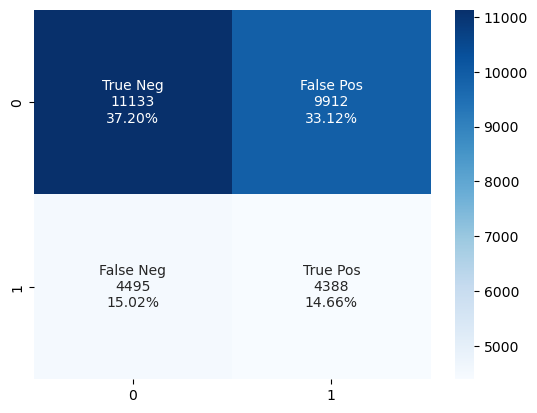

In [32]:
# Fitting the model and calculating the performance metrics
for model in models:
    model.fit(X1_train, y1_train)
    test_data_prediction = model.predict(X1_test)
    train_data_prediction = model.predict(X1_train)
    mae = mean_absolute_error(y1_train, train_data_prediction)
    mae2 = mean_absolute_error(y1_test, test_data_prediction)
    mse = mean_squared_error(y1_train, train_data_prediction)
    mse2 = mean_squared_error(y1_test, test_data_prediction)
    precision = precision_score(y1_train, train_data_prediction)
    precision2 = precision_score(y1_test, test_data_prediction)
    recall = recall_score(y1_train, train_data_prediction)
    recall2 = recall_score(y1_test, test_data_prediction)
    #r2 = r2_score(y1_test, test_data_prediction)
    f1_1 = f1_score(y1_train, train_data_prediction)
    f1_2 = f1_score(y1_test, test_data_prediction)
    accuracy = accuracy_score(y1_train, train_data_prediction)
    accuracy2 = accuracy_score(y1_test, test_data_prediction)
    print('Accuracy of the model (training)', model, '= ', accuracy)
    print('Accuracy of the model (testing)', model, '= ', accuracy2)
    print('F1 score of the model (training)', model, '= ', f1_1)
    print('F1 score of the model (testing)', model, '= ', f1_2)
    print('Mean Absolute Error of the model (training)', model, '= ', mae)
    print('Mean Absolute Error of the model (testing)', model, '= ', mae2)
    print('Mean Squared Error of the model (training)', model, '= ', mse)
    print('Mean Squared Error of the model (testing)', model, '= ', mse2)
    print('Precision of the model (training)', model, '= ', precision)
    print('Precision of the model (testing)', model, '= ', precision2)
    print('Recall of the model (training)', model, '= ', recall)
    print('Recall of the model (testing)', model, '= ', recall2, '\n')

    cf_matrix =confusion_matrix(y1_test, test_data_prediction)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Experiment 3: Feature Selection

### Only using the "Merchant Name" feature does this model somewhat perform decently. 

In [33]:
sel = SelectFromModel(LogisticRegression(n_jobs=-1, random_state=26))
sel.fit(X1_train, y1_train)

selected_feat= X1_train.columns[(sel.get_support())]

print(selected_feat)

Index(['Merchant Name'], dtype='object')


In [34]:
y3 = df['Is Fraud?']
X3 = df[selected_feat]

# Splitting the data 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=42)

In [35]:
#  storing the model objects for testing
models = [LogisticRegression(n_jobs=-1, random_state=26)]

Accuracy of the model (training) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.8665883801858827
Accuracy of the model (testing) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.8348703555199145
F1 score of the model (training) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.7704287826515525
F1 score of the model (testing) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.7126410047679962
Mean Absolute Error of the model (training) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.13341161981411734
Mean Absolute Error of the model (testing) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.16512964448008555
Mean Squared Error of the model (training) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.13341161981411734
Mean Squared Error of the model (testing) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.16512964448008555
Precision of the model (training) RandomForestClassifier(n_jobs=-1, random_state=26) =  0.7932609357556074
Pre

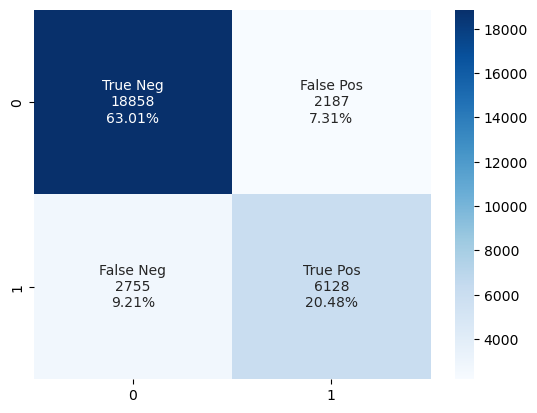

In [36]:
# Testing the model using different criterion
# models = [RandomForestClassifier(criterion='gini', n_jobs=-1), RandomForestClassifier(criterion='entrophy', n_jobs=-1), RandomForestClassifier(criterion='log_loss', n_jobs=-1)]
for model in models3:
    model.fit(X3_train, y3_train)
    test_data_prediction = model.predict(X3_test)
    train_data_prediction = model.predict(X3_train)
    mae = mean_absolute_error(y3_train, train_data_prediction)
    mae2 = mean_absolute_error(y3_test, test_data_prediction)
    mse = mean_squared_error(y3_train, train_data_prediction)
    mse2 = mean_squared_error(y3_test, test_data_prediction)
    precision = precision_score(y3_train, train_data_prediction)
    precision2 = precision_score(y3_test, test_data_prediction)
    recall = recall_score(y3_train, train_data_prediction)
    recall2 = recall_score(y3_test, test_data_prediction)
    #r2 = r2_score(y1_test, test_data_prediction)
    f1_1 = f1_score(y3_train, train_data_prediction)
    f1_2 = f1_score(y3_test, test_data_prediction)
    accuracy = accuracy_score(y3_train, train_data_prediction)
    accuracy2 = accuracy_score(y3_test, test_data_prediction)
    print('Accuracy of the model (training)', model, '= ', accuracy)
    print('Accuracy of the model (testing)', model, '= ', accuracy2)
    print('F1 score of the model (training)', model, '= ', f1_1)
    print('F1 score of the model (testing)', model, '= ', f1_2)
    print('Mean Absolute Error of the model (training)', model, '= ', mae)
    print('Mean Absolute Error of the model (testing)', model, '= ', mae2)
    print('Mean Squared Error of the model (training)', model, '= ', mse)
    print('Mean Squared Error of the model (testing)', model, '= ', mse2)
    print('Precision of the model (training)', model, '= ', precision)
    print('Precision of the model (testing)', model, '= ', precision2)
    print('Recall of the model (training)', model, '= ', recall)
    print('Recall of the model (testing)', model, '= ', recall2, '\n')

    cf_matrix =confusion_matrix(y3_test, test_data_prediction)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Archel Olazabal | Naives Baye

## Experiment 1: Baseline

In [37]:
models = [BernoulliNB()]

Accuracy of the model (training) BernoulliNB() =  0.869008578097925
Accuracy of the model (testing) BernoulliNB() =  0.8704891740176424
F1 score of the model (training) BernoulliNB() =  0.7919670677067935
F1 score of the model (testing) BernoulliNB() =  0.7933681629171554
Mean Absolute Error of the model (training) BernoulliNB() =  0.13099142190207508
Mean Absolute Error of the model (testing) BernoulliNB() =  0.12951082598235766
Mean Squared Error of the model (training) BernoulliNB() =  0.13099142190207508
Mean Squared Error of the model (testing) BernoulliNB() =  0.12951082598235766
Precision of the model (training) BernoulliNB() =  0.7538861225373458
Precision of the model (testing) BernoulliNB() =  0.7535189873417721
Recall of the model (training) BernoulliNB() =  0.8340998371179458
Recall of the model (testing) BernoulliNB() =  0.8376674546887313 



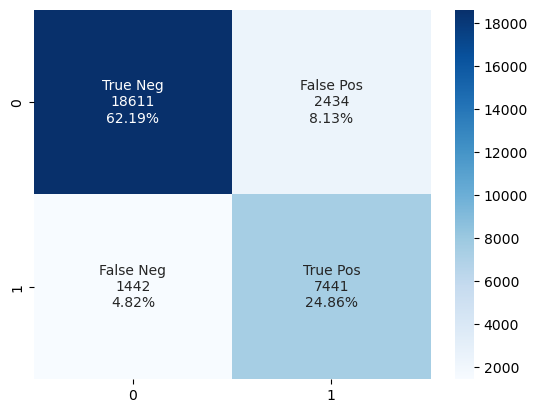

In [38]:
# Fitting the model and calculating the performance metrics
for model in models:
    model.fit(X1_train, y1_train)
    test_data_prediction = model.predict(X1_test)
    train_data_prediction = model.predict(X1_train)
    mae = mean_absolute_error(y1_train, train_data_prediction)
    mae2 = mean_absolute_error(y1_test, test_data_prediction)
    mse = mean_squared_error(y1_train, train_data_prediction)
    mse2 = mean_squared_error(y1_test, test_data_prediction)
    precision = precision_score(y1_train, train_data_prediction)
    precision2 = precision_score(y1_test, test_data_prediction)
    recall = recall_score(y1_train, train_data_prediction)
    recall2 = recall_score(y1_test, test_data_prediction)
    #r2 = r2_score(y1_test, test_data_prediction)
    f1_1 = f1_score(y1_train, train_data_prediction)
    f1_2 = f1_score(y1_test, test_data_prediction)
    accuracy = accuracy_score(y1_train, train_data_prediction)
    accuracy2 = accuracy_score(y1_test, test_data_prediction)
    print('Accuracy of the model (training)', model, '= ', accuracy)
    print('Accuracy of the model (testing)', model, '= ', accuracy2)
    print('F1 score of the model (training)', model, '= ', f1_1)
    print('F1 score of the model (testing)', model, '= ', f1_2)
    print('Mean Absolute Error of the model (training)', model, '= ', mae)
    print('Mean Absolute Error of the model (testing)', model, '= ', mae2)
    print('Mean Squared Error of the model (training)', model, '= ', mse)
    print('Mean Squared Error of the model (testing)', model, '= ', mse2)
    print('Precision of the model (training)', model, '= ', precision)
    print('Precision of the model (testing)', model, '= ', precision2)
    print('Recall of the model (training)', model, '= ', recall)
    print('Recall of the model (testing)', model, '= ', recall2, '\n')

    cf_matrix =confusion_matrix(y1_test, test_data_prediction)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Experiment 2: Hyper Parameter tuning

### The experiment did not change anything from the baseline

In [39]:
# Creating the dictionary for hyperparameter tuning
search_space = {
    "alpha" : [0.001, 0.01, 0.1, 1, 1.2, 1.4, 1.6],
    #"force_alpha" : [True, False],
    "binarize" : [0.001, 0.01, 0.1, 1, 1.2, 1.4, 1.6],
}

# Creating the tuner
GS = GridSearchCV(
    estimator = BernoulliNB(),
    param_grid = search_space,
    scoring = ["f1", "precision", "recall", "accuracy", "neg_root_mean_squared_error"],
    refit = "f1",
    cv=3,
    verbose=4,
)

In [40]:
GS.fit(X1_train, y1_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits
[CV 1/3] END alpha=0.001, binarize=0.001; accuracy: (test=0.868) f1: (test=0.789) neg_root_mean_squared_error: (test=-0.364) precision: (test=0.753) recall: (test=0.829) total time=   0.0s
[CV 2/3] END alpha=0.001, binarize=0.001; accuracy: (test=0.868) f1: (test=0.791) neg_root_mean_squared_error: (test=-0.363) precision: (test=0.752) recall: (test=0.835) total time=   0.0s
[CV 3/3] END alpha=0.001, binarize=0.001; accuracy: (test=0.871) f1: (test=0.795) neg_root_mean_squared_error: (test=-0.359) precision: (test=0.757) recall: (test=0.838) total time=   0.0s
[CV 1/3] END alpha=0.001, binarize=0.01; accuracy: (test=0.868) f1: (test=0.789) neg_root_mean_squared_error: (test=-0.364) precision: (test=0.753) recall: (test=0.829) total time=   0.0s
[CV 2/3] END alpha=0.001, binarize=0.01; accuracy: (test=0.868) f1: (test=0.791) neg_root_mean_squared_error: (test=-0.363) precision: (test=0.752) recall: (test=0.835) total time=   

GridSearchCV(cv=3, estimator=BernoulliNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 1.2, 1.4, 1.6],
                         'binarize': [0.001, 0.01, 0.1, 1, 1.2, 1.4, 1.6]},
             refit='f1',
             scoring=['f1', 'precision', 'recall', 'accuracy',
                      'neg_root_mean_squared_error'],
             verbose=4)

In [41]:
print(GS.best_score_)
print(GS.best_params_)

0.7919636604921673
{'alpha': 1, 'binarize': 0.001}


In [42]:
parameters3 = GS.best_params_
models = [BernoulliNB(alpha=parameters3['alpha'], binarize=parameters3['binarize'])]

Accuracy of the model (training) BernoulliNB(alpha=1, binarize=0.001) =  0.869008578097925
Accuracy of the model (testing) BernoulliNB(alpha=1, binarize=0.001) =  0.8704891740176424
F1 score of the model (training) BernoulliNB(alpha=1, binarize=0.001) =  0.7919670677067935
F1 score of the model (testing) BernoulliNB(alpha=1, binarize=0.001) =  0.7933681629171554
Mean Absolute Error of the model (training) BernoulliNB(alpha=1, binarize=0.001) =  0.13099142190207508
Mean Absolute Error of the model (testing) BernoulliNB(alpha=1, binarize=0.001) =  0.12951082598235766
Mean Squared Error of the model (training) BernoulliNB(alpha=1, binarize=0.001) =  0.13099142190207508
Mean Squared Error of the model (testing) BernoulliNB(alpha=1, binarize=0.001) =  0.12951082598235766
Precision of the model (training) BernoulliNB(alpha=1, binarize=0.001) =  0.7538861225373458
Precision of the model (testing) BernoulliNB(alpha=1, binarize=0.001) =  0.7535189873417721
Recall of the model (training) Bernoul

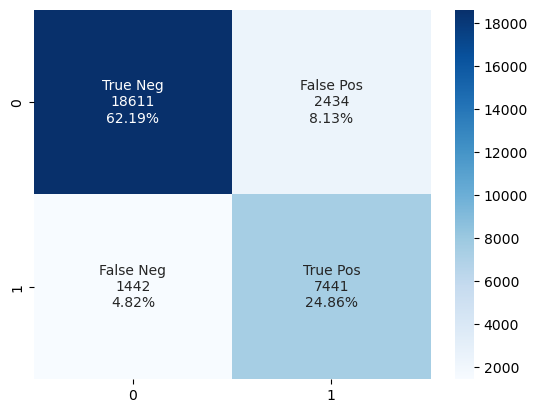

In [43]:
# Fitting the model and calculating the performance metrics
for model in models:
    model.fit(X1_train, y1_train)
    test_data_prediction = model.predict(X1_test)
    train_data_prediction = model.predict(X1_train)
    mae = mean_absolute_error(y1_train, train_data_prediction)
    mae2 = mean_absolute_error(y1_test, test_data_prediction)
    mse = mean_squared_error(y1_train, train_data_prediction)
    mse2 = mean_squared_error(y1_test, test_data_prediction)
    precision = precision_score(y1_train, train_data_prediction)
    precision2 = precision_score(y1_test, test_data_prediction)
    recall = recall_score(y1_train, train_data_prediction)
    recall2 = recall_score(y1_test, test_data_prediction)
    #r2 = r2_score(y1_test, test_data_prediction)
    f1_1 = f1_score(y1_train, train_data_prediction)
    f1_2 = f1_score(y1_test, test_data_prediction)
    accuracy = accuracy_score(y1_train, train_data_prediction)
    accuracy2 = accuracy_score(y1_test, test_data_prediction)
    print('Accuracy of the model (training)', model, '= ', accuracy)
    print('Accuracy of the model (testing)', model, '= ', accuracy2)
    print('F1 score of the model (training)', model, '= ', f1_1)
    print('F1 score of the model (testing)', model, '= ', f1_2)
    print('Mean Absolute Error of the model (training)', model, '= ', mae)
    print('Mean Absolute Error of the model (testing)', model, '= ', mae2)
    print('Mean Squared Error of the model (training)', model, '= ', mse)
    print('Mean Squared Error of the model (testing)', model, '= ', mse2)
    print('Precision of the model (training)', model, '= ', precision)
    print('Precision of the model (testing)', model, '= ', precision2)
    print('Recall of the model (training)', model, '= ', recall)
    print('Recall of the model (testing)', model, '= ', recall2, '\n')

    cf_matrix =confusion_matrix(y1_test, test_data_prediction)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')